# Earnings based on College Majors

## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv("recent-grads.csv")

## Checking data

In [3]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
df.shape

(173, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
df.Employed.head()

0     1976
1      640
2      648
3      758
4    25694
Name: Employed, dtype: int64

In [8]:
df.Employed.iloc[150]

46624

In [9]:
df['Major_category'].value_counts().sort_values(ascending=False)

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

## Missing Values

In [10]:
df[df.isnull().any(axis=1)].head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [11]:
import missingno as msno

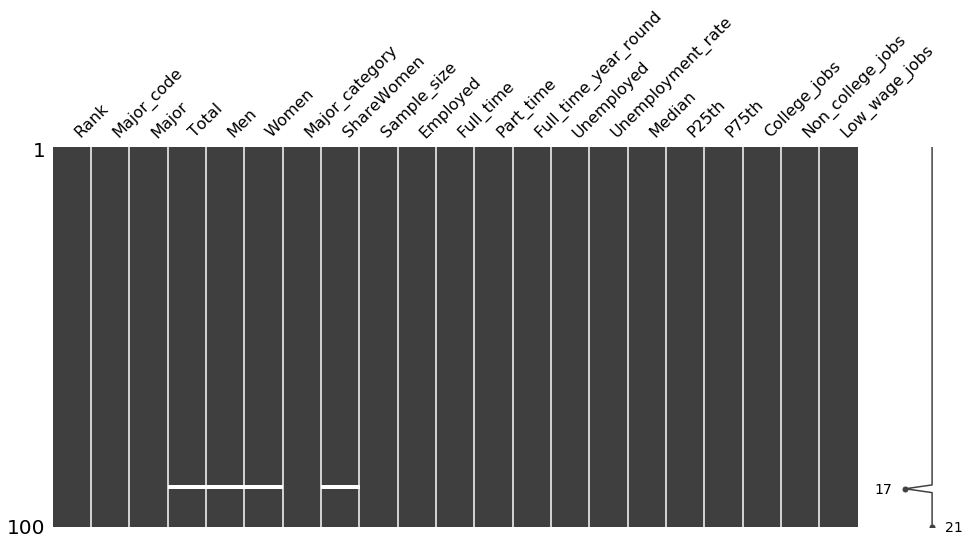

In [12]:
msno.matrix(df.sample(100),
            figsize=(16, 7),
            width_ratios=(15, 1))

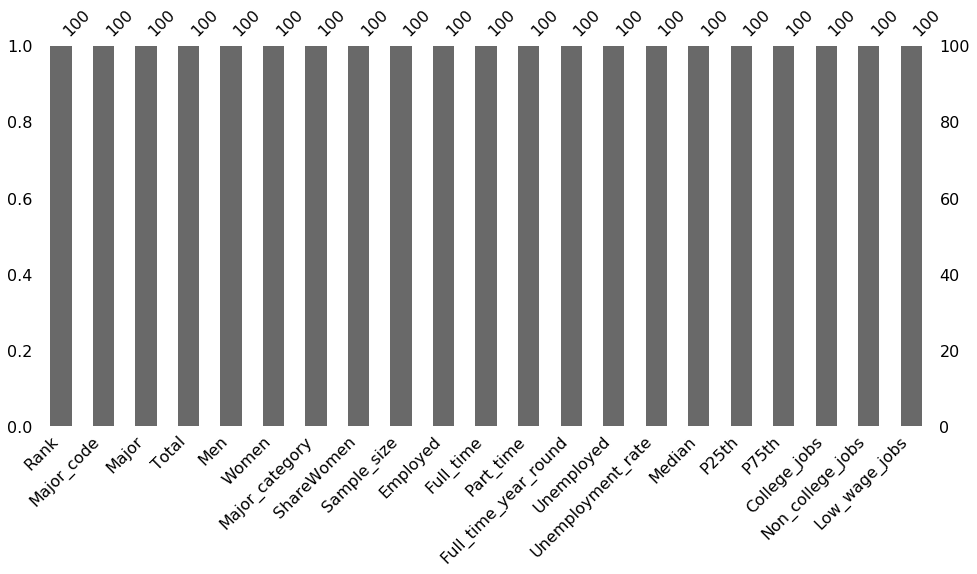

In [13]:
msno.bar(df.sample(100),
            figsize=(16, 7),)

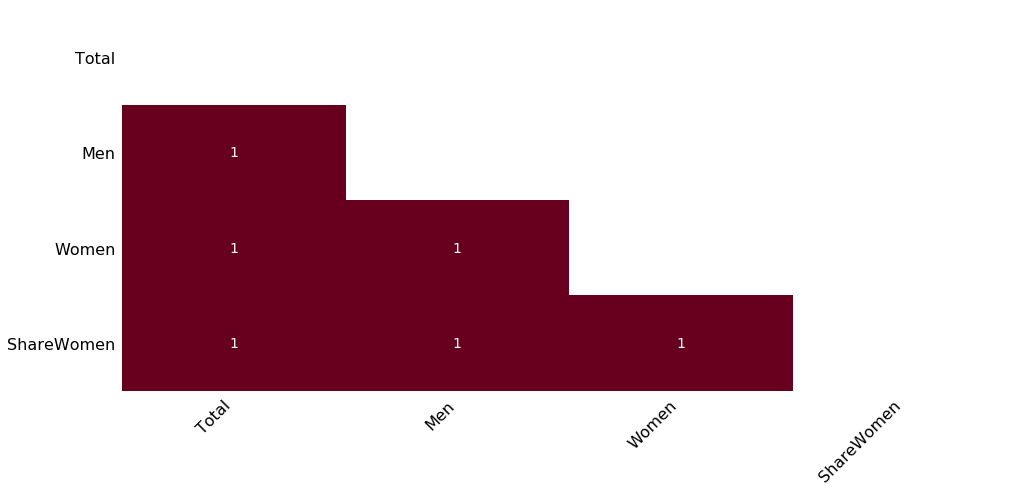

In [14]:
msno.heatmap(df.sample(100),
            figsize=(16, 7),)

**We have enough evidence that there is missing data. It is not of serous nature though. There are few missing value. Still we will treat it **

In [15]:
print("All variables:", len(df))
print("ShareWomen_with_nulls:", len(df[(df.ShareWomen.isnull())]))

All variables: 173
ShareWomen_with_nulls: 1


### Treating missing values

In [16]:
median = df["ShareWomen"].median()
median

0.534024037

In [17]:
df["ShareWomen"].fillna(median, inplace=True)

In [18]:
df["Total"].fillna(median, inplace=True)

In [19]:
df["Men"].fillna(median, inplace=True)

In [20]:
df["Women"].fillna(median, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   173 non-null float64
Men                     173 non-null float64
Women                   173 non-null float64
Major_category          173 non-null object
ShareWomen              173 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

**We have zero missing value now**

## Scatterplots
Sample size vs median

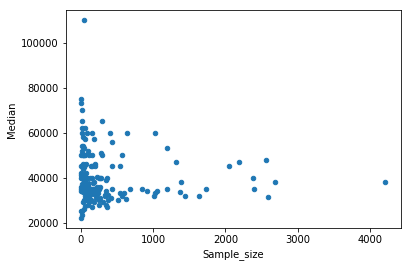

In [22]:
df.plot(kind='scatter', x="Sample_size", y="Median")
plt.show()

It seems that the median salary varies largely when sample size is small. The Median salary seems to have a mildly positive relationship with the sample size. This tells that the more popular majors make more mony but only mildly

**Sample size vs unemployment rate**

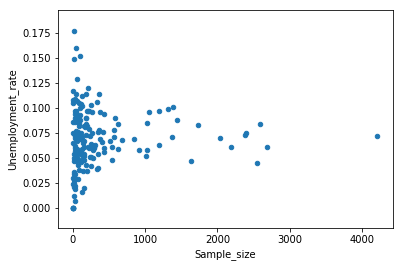

In [23]:
df.plot(kind='scatter', x="Sample_size", y="Unemployment_rate")
plt.show()

There is huge variation of unemployment rate in the unpopular majors and this rate seems to be more certian with the popular majors. But it is mildly positive relationship suggesting that more popular a major is, the more higher the unemployment rate of those students will be.

**Full_time vs median**

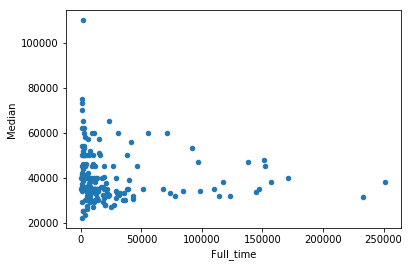

In [24]:
df.plot(kind='scatter', x="Full_time", y="Median")
plt.show()

The number of full time employees has a moderately positive relation with the median salary but the slope of this relationship is very mild. The certainity of the median salary is very low when the full time employees are low in a major.

**Sharewoman vs umemployment rate**

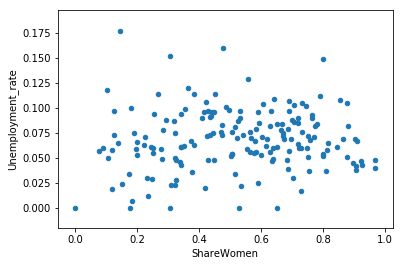

In [25]:
df.plot(kind='scatter', x="ShareWomen", y="Unemployment_rate")
plt.show()

There seems no clear relationship in these two variables

**Men vs Median**

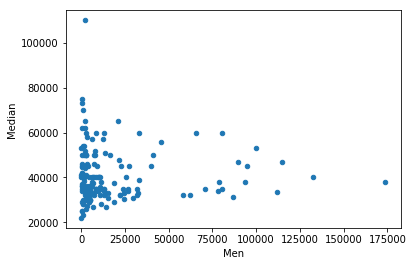

In [26]:
df.plot(kind='scatter', x="Men", y="Median")
plt.show()

**Women vs Median**

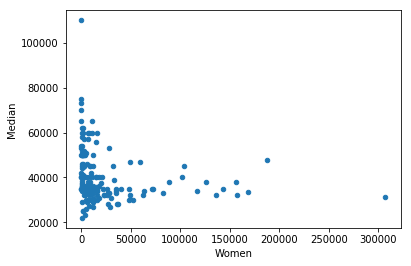

In [27]:
df.plot(kind='scatter', x="Women", y="Median")
plt.show()

Both men and women seem to have similar relationship with the median salary. Again, low number of men and women dont relate well with the median salary but as ttheir number grows this relatonship beecomes more certain. The relationships are positive but have very mild slopes.

## Histogram

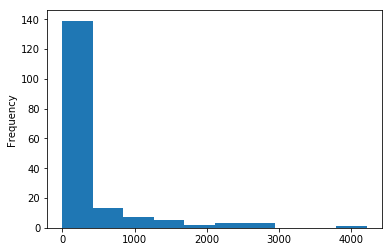

In [28]:
df["Sample_size"].plot(kind='hist')
plt.show()

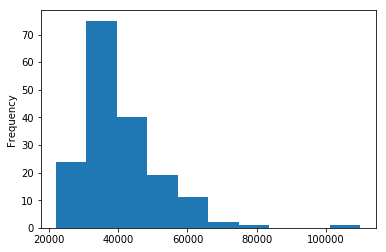

In [29]:
df["Median"].plot(kind='hist')
plt.show()

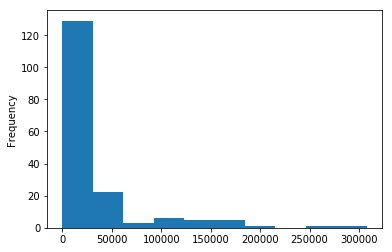

In [30]:
df["Employed"].plot(kind='hist')
plt.show()

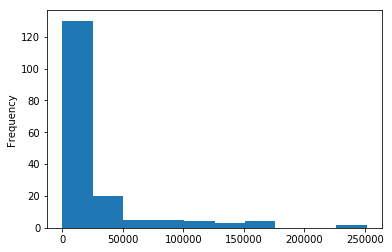

In [31]:
df["Full_time"].plot(kind='hist')
plt.show()

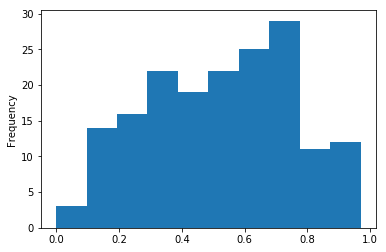

In [32]:
df["ShareWomen"].plot(kind='hist')
plt.show()

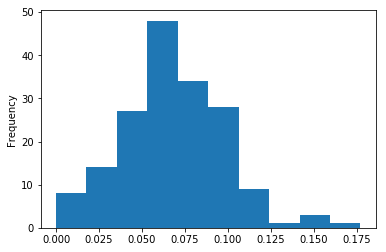

In [33]:
df["Unemployment_rate"].plot(kind='hist')
plt.show()

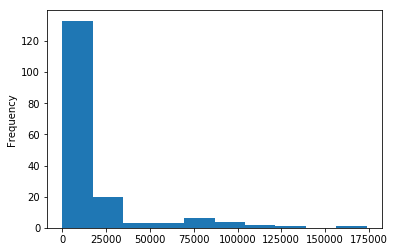

In [34]:
df["Men"].plot(kind='hist')
plt.show()

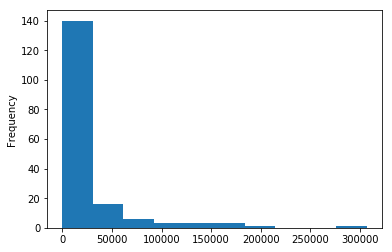

In [35]:
df["Women"].plot(kind='hist')
plt.show()

Except **ShareWomen** and **Unemployment_rate**, all the variables are right skewed. The variable **Median** has peak more towards center as compared to the other highly right-skewed variables. Interestingly the highes number of the **Women** graduates was almost double of that of **Men** graduates.

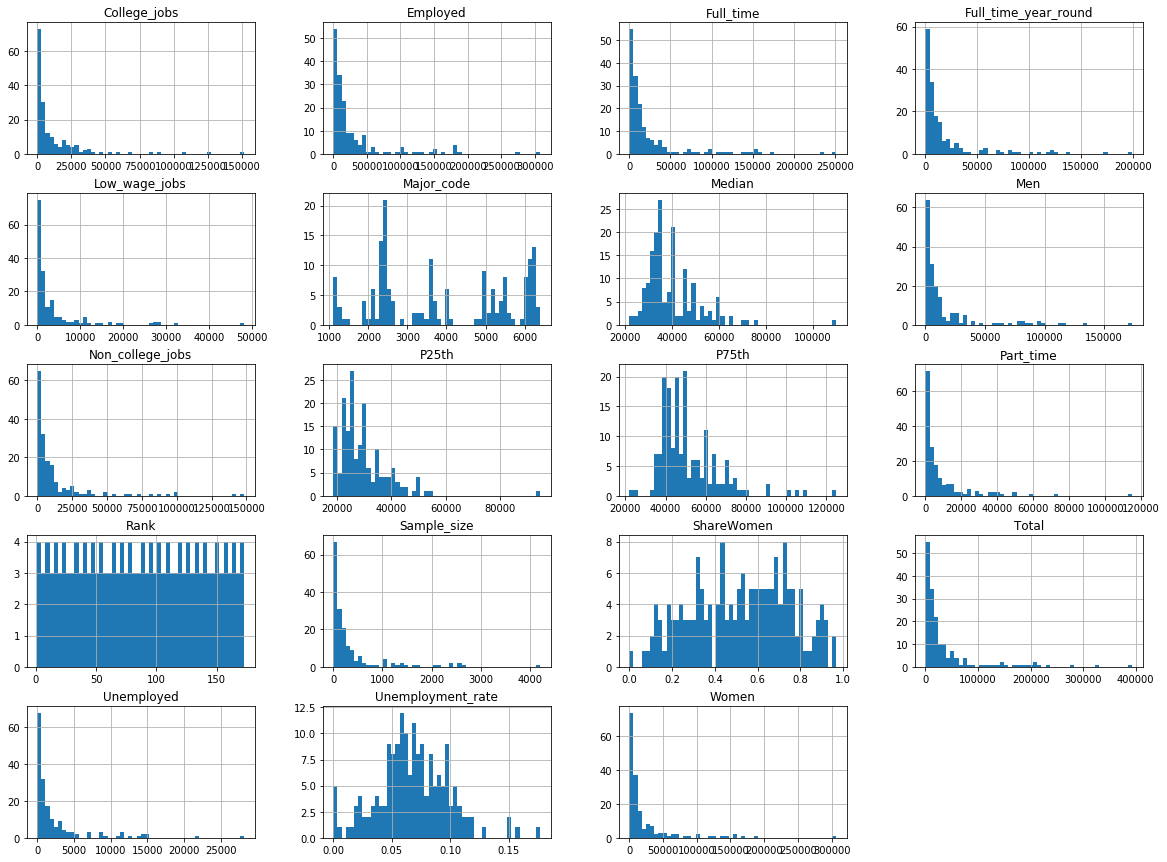

In [36]:
# All in one go
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Scatter Matrix

In [37]:
from pandas.tools.plotting import scatter_matrix

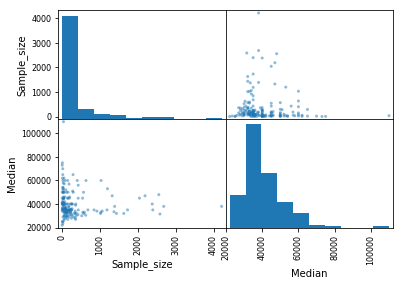

In [38]:
scatter_matrix(df[["Sample_size", "Median"]])
plt.show()

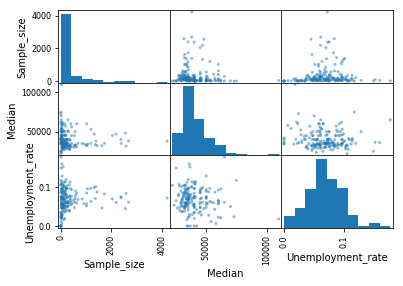

In [39]:
scatter_matrix(df[["Sample_size", "Median", "Unemployment_rate"]])
plt.show()

## Bar plots

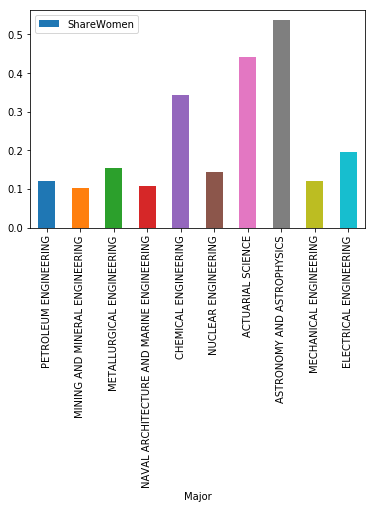

In [40]:
df[:10].plot.bar(x='Major', y='ShareWomen')
plt.show()

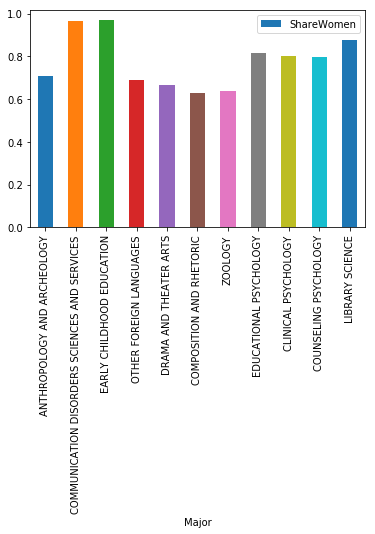

In [41]:
df[162:].plot.bar(x='Major', y='ShareWomen')
plt.show()

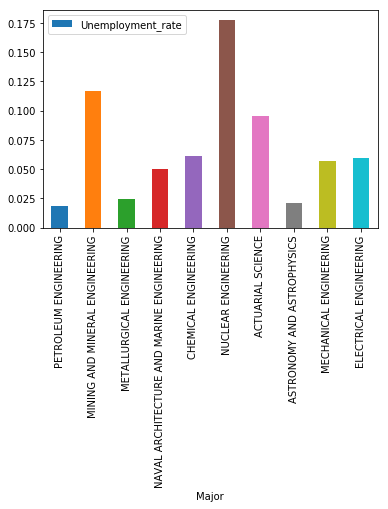

In [42]:
df[:10].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

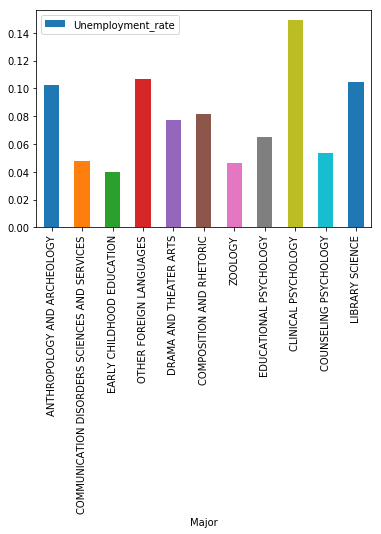

In [43]:
df[162:].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

## Correlation Matrix

In [44]:
corr_matrix=df.corr()

In [45]:
# Finding relation of our dependant variable with others. 
corr_matrix['Median'].sort_values(ascending=False)

Median                  1.000000
P75th                   0.901923
P25th                   0.891683
Men                     0.021988
College_jobs           -0.050276
Sample_size            -0.067578
Full_time_year_round   -0.072982
Full_time              -0.082258
Employed               -0.107547
Unemployment_rate      -0.108833
Total                  -0.110273
Unemployed             -0.126386
Non_college_jobs       -0.174363
Major_code             -0.176072
Women                  -0.185608
Part_time              -0.190124
Low_wage_jobs          -0.209431
ShareWomen             -0.616078
Rank                   -0.873308
Name: Median, dtype: float64

### Pairplot

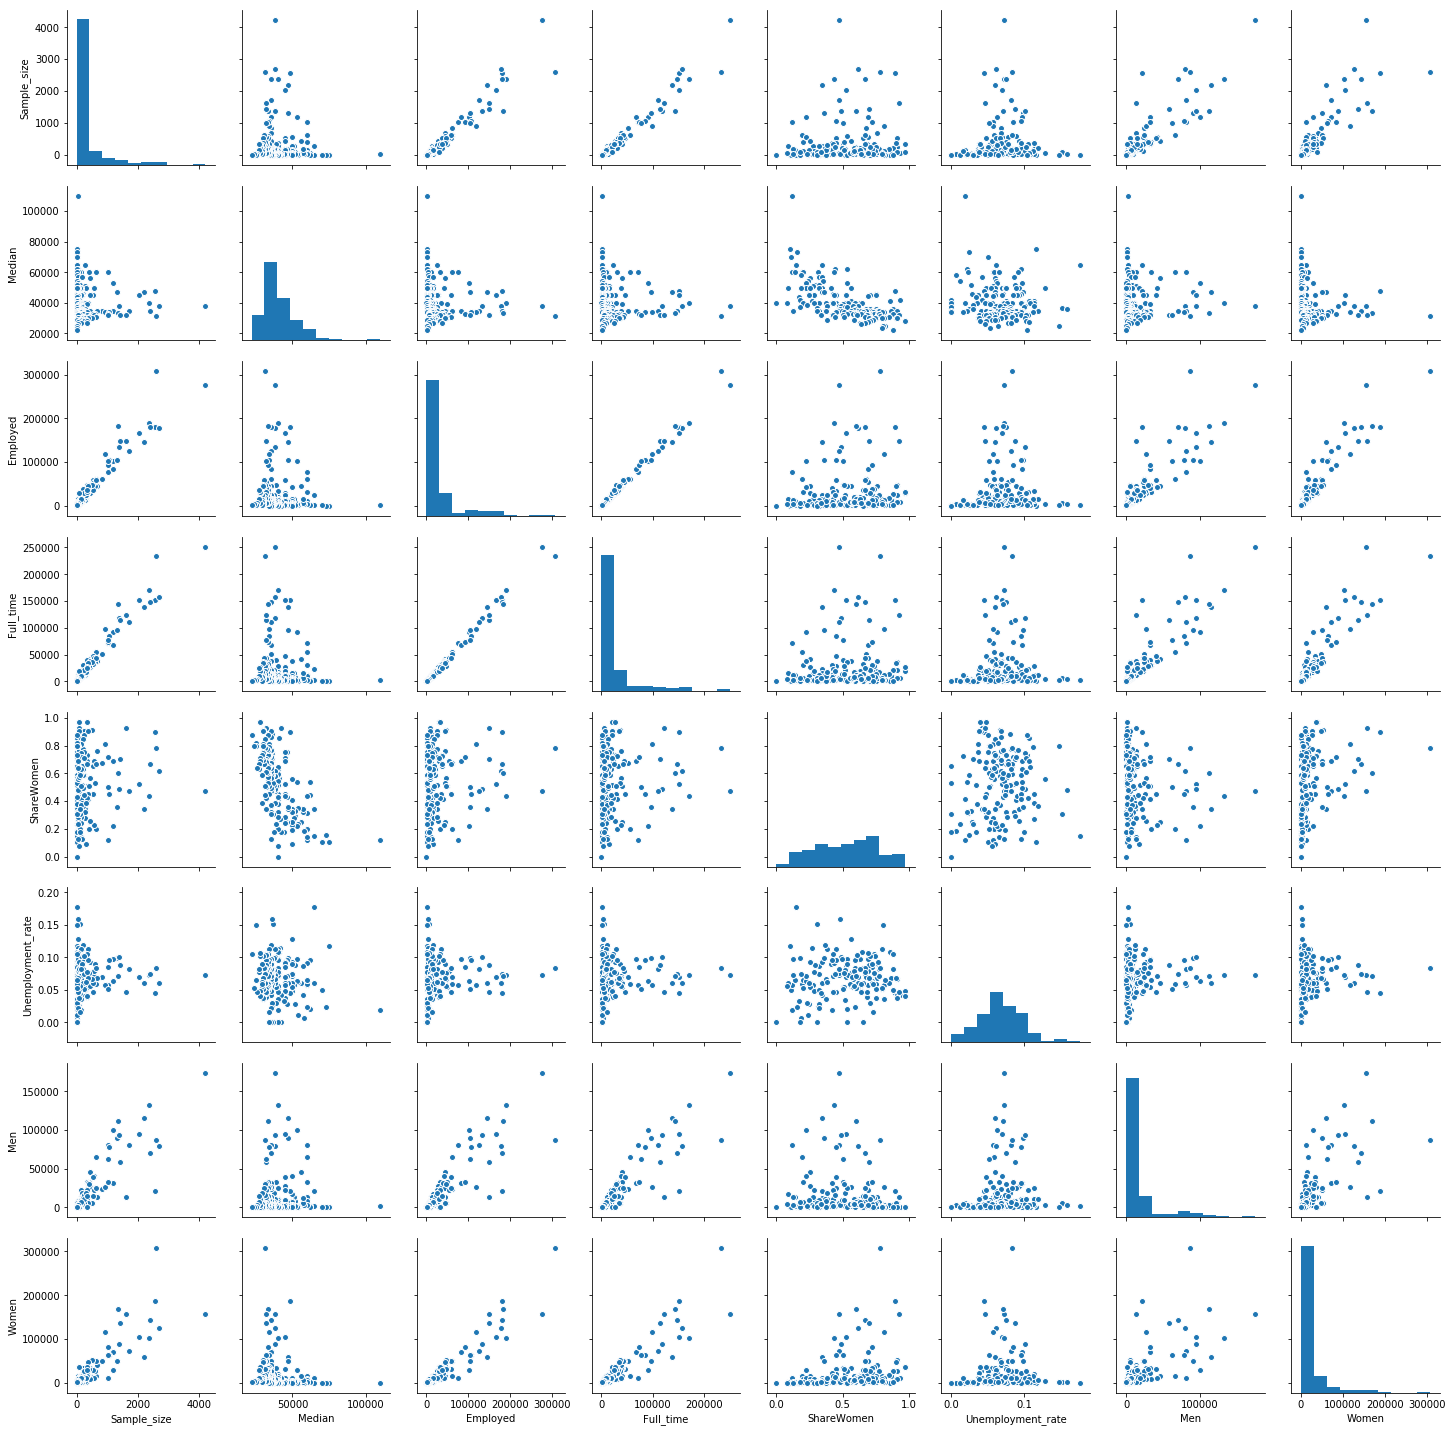

In [46]:
#using seaborn now for pairplot
sns.pairplot(df[['Sample_size','Median','Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']])

## Splitting dataset 

In [47]:
df.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [48]:
X = df[['Sample_size','Major_category', 'Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']]

In [49]:
X.head()

,Sample_size,Major_category,Employed,Full_time,ShareWomen,Unemployment_rate,Men,Women
0,36,Engineering,1976,1849,0.120564,0.018381,2057.0,282.0
1,7,Engineering,640,556,0.101852,0.117241,679.0,77.0
2,3,Engineering,648,558,0.153037,0.024096,725.0,131.0
3,16,Engineering,758,1069,0.107313,0.050125,1123.0,135.0
4,289,Engineering,25694,23170,0.341631,0.061098,21239.0,11021.0


In [50]:
X.shape

(173, 8)

In [51]:
X['Major_category'].value_counts().sort_values(ascending=False).head()

Engineering                  29
Education                    16
Humanities & Liberal Arts    15
Biology & Life Science       14
Business                     13
Name: Major_category, dtype: int64

In [52]:
X=pd.get_dummies(X,columns=['Major_category'])

In [53]:
X.head()

,Sample_size,Employed,Full_time,ShareWomen,Unemployment_rate,Men,Women,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,36,1976,1849,0.120564,0.018381,2057.0,282.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,7,640,556,0.101852,0.117241,679.0,77.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,648,558,0.153037,0.024096,725.0,131.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16,758,1069,0.107313,0.050125,1123.0,135.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,289,25694,23170,0.341631,0.061098,21239.0,11021.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
X.shape

(173, 23)

In [55]:
y=df.Median
y.head()

0    110000
1     75000
2     73000
3     70000
4     65000
Name: Median, dtype: int64

## Splitting dataset into train and test set

In [59]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Fitting Regression model

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_pred = regressor.predict(x_test)

In [62]:
y_test

54     41000
146    31000
63     40000
55     41000
125    33000
100    35000
7      62000
155    30000
104    35000
89     36000
138    32000
143    32000
5      65000
97     35000
163    28000
93     35000
33     50000
18     54000
61     40000
51     42000
66     40000
37     46000
4      65000
118    34000
60     40000
109    35000
123    33400
139    32000
110    35000
159    29000
26     50000
56     40100
126    33000
45     45000
8      60000
Name: Median, dtype: int64

In [63]:
y_pred

array([36169.10896787, 30243.61032349, 38361.99830932, 25857.32919649,
       34974.62442346, 29594.05361492, 41938.3917457 , 29638.41412358,
       37962.38379205, 42639.34739244, 36271.23544496, 39231.82701347,
       57008.02552359, 40060.46418781, 35400.21657816, 31664.24305373,
       56282.12325745, 56104.49327745, 35203.35260529, 34515.55350786,
       61568.49987326, 43383.56760067, 55913.06090408, 35076.72108721,
       41229.49657127, 34140.79595543, 34123.19456148, 22940.6028093 ,
       46002.34590959, 33750.2050931 , 38039.61397642, 36732.64288631,
       40617.4514075 , 45413.12920488, 56088.32636484])

In [64]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((173, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Median   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     10.95
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.69e-21
Time:                        14:10:23   Log-Likelihood:                -1779.2
No. Observations:                 173   AIC:                             3604.
Df Residuals:                     150   BIC:                             3677.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.65e+04   2810.982     16.541      0.000    4.09e+04    5.21e+04
x1            -6.6868      8.008     -0.835      0.405     -22.510       9.136
x2            -0.2996      0.370     -0.810      0.419      -1.031       0.431
x3             0.5202      0.352      1.479      0.141      -0.175       1.215
x4          -1.71e+04   4656.043     -3.672      0.000   -2.63e+04   -7897.112
x5          -2.03e+04   2.19e+04     -0.925      0.356   -6.36e+04     2.3e+04
x6            -0.1250      0.167     -0.747      0.456      -0.456       0.206
x7            -0.0027      0.191     -0.014      0.989      -0.381       0.375
x8         -1071.8077   2447.077     -0.438      0.662   -5907.000    3763.384
x9           895.5383   2989.292      0.300      0.765   -5011.020    6802.097
x10         1557.4843   2197.099      0.709      0.479   -2783.775    5898.743
x11         6793.5940   2515.307      2.701      0.008    1823.586    1.18e+04
x12         1846.7181   3924.188      0.471      0.639   -5907.106    9600.542
x13         4085.1252   2509.159      1.628      0.106    -872.736    9042.986
x14        -1389.6876   2309.934     -0.602      0.548   -5953.898    3174.523
x15         1.666e+04   1986.449      8.385      0.000    1.27e+04    2.06e+04
x16         4826.7272   2481.863      1.945      0.054     -77.199    9730.653
x17         -996.1045   2136.856     -0.466      0.642   -5218.330    3226.121
x18        -2392.1176   2931.463     -0.816      0.416   -8184.411    3400.176
x19         3119.0655   7273.335      0.429      0.669   -1.13e+04    1.75e+04
x20         6196.9813   3339.600      1.856      0.065    -401.753    1.28e+04
x21         5311.2793   2445.396      2.172      0.031     479.409    1.01e+04
x22        -1554.9088   2807.396     -0.554      0.580   -7102.058    3992.240
x23         2614.0173   2631.930      0.993      0.322   -2586.426    7814.461
==============================================================================
Omnibus:                      111.103   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1376.458
Skew:                           2.104   Prob(JB):                    1.28e-299
Kurtosis:                      16.162   Cond. No.                     8.85e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**From here we can make statistical analysis. We will check p-value for significance and then we can make estimation by checking values of co-efficient.<br>
Only X1, X2,X6 and X17 are significant whereas X13 is partially significant.<br>**

X1=Sample_size<br>
X2=Employed<br>
X6=MEn<br>
X17=Major_category_health<br>
X13=Major_category_law&Public policy<br>


As our main problem was how median salary is related to major category. We can notice that major in health and Law & Public policy earn very well than other categories if their gender is men. With our data, women does not significance feature so, we cannot suggest anything. It seems they have disadvantage even in health and law categories.